In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.19.0


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Training data shape: {x_train.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 28, 28)


In [4]:
x_train=x_train/255
x_test=x_test/255

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , ReLU , PReLU ,Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
model=Sequential()
# 748,392,196,98,49,10(accuracy:0.9807)
# 392,196,98,10(accuracy:0.977)
# 256,128,64,10(accuracy:0.9761)(batch_norm)

In [7]:
model.add(Flatten(input_shape=(28,28))) #input layer

model.add(Dense(units=392,activation='relu')) #first hidden layer
model.add(BatchNormalization())

model.add(Dense(units=196,activation='relu')) #second hidden layer
model.add(BatchNormalization())

model.add(Dense(units=98,activation='relu')) #third hidden layer
model.add(BatchNormalization())

model.add(Dense(units=10,activation='softmax')) #output

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer=Adam(learning_rate=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
earlystop=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=8,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [10]:
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=10)
model_history = model.fit(x_train, y_train_encoded, validation_split=0.33, batch_size=64, epochs=1000, callbacks=earlystop)

Epoch 1/1000
629/629 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8516 - loss: 0.4895 - val_accuracy: 0.9596 - val_loss: 0.1345
Epoch 2/1000
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9713 - loss: 0.0986 - val_accuracy: 0.9658 - val_loss: 0.1169
Epoch 3/1000
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9822 - loss: 0.0626 - val_accuracy: 0.9670 - val_loss: 0.1115
Epoch 4/1000
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9866 - loss: 0.0448 - val_accuracy: 0.9714 - val_loss: 0.0968
Epoch 5/1000
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9903 - loss: 0.0322 - val_accuracy: 0.9701 - val_loss: 0.1033
Epoch 6/1000
629/629 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9870 - loss: 0.0396 - val_accuracy: 0.9728 - val_loss: 0.0985
Epoch 7/1000
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9917 - loss: 0.0257 - val_accuracy: 0.9752 - val_loss: 0.0941
Epoch 8/1000
629/629 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9940 - loss: 0.0193 -

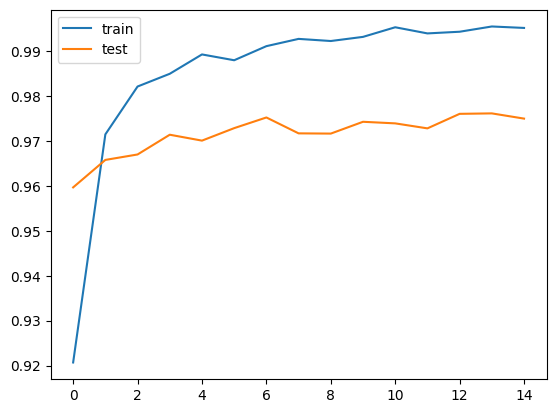

In [11]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['train','test'],loc='upper left')
plt.show()

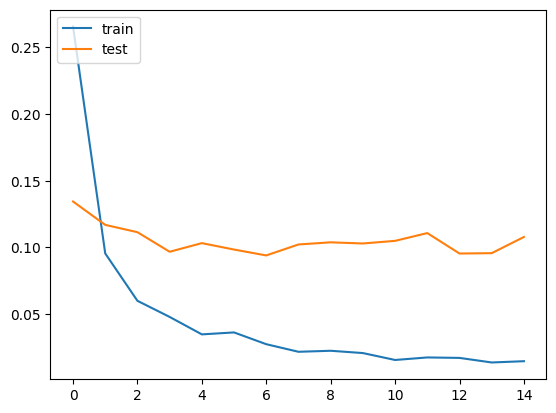

In [12]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.legend(['train','test'],loc='upper left')
plt.show()

In [13]:
y_pred_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [14]:
import numpy as np
y_pred1 = np.argmax(y_pred_prob, axis=1)

In [15]:
from sklearn.metrics import classification_report
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=10)
print(classification_report(np.argmax(y_test_encoded, axis=1), y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [16]:
loss, accuracy = model.evaluate(x_test, y_test_encoded)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0.0900
Test Accuracy: 0.9771999716758728


In [17]:
model.save("mnist_ann_model.keras")